In [1]:
# Import libraries used
from os import path
import glob
import re

import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
# Load LISST CSV column names from json containing column headers
headers = pd.read_json("./inst_headers/lisst_hdr.json", typ='series', orient='records')
csvhdr = headers.iloc[0]
# aschdr = headers.iloc[1] # CTD cast data headers for .asc files

In [3]:
# Define functions
def load_live_data(testname, csvhdr, testnum=1):
    # Define paths to data
    lisst_path = "C:/Users/kylene.cooley/Documents/prtsz_bench_test"
    live_data_path = f"{testname}_livedata_{testnum}.csv"
    # Load LISST data processed with onboard clean water background
    f = path.join(lisst_path, live_data_path)
    lisst_live = pd.read_csv(f, names=csvhdr)
    try: print(lisst_live.head(1)) 
    except: print("No {testname} LISST data")
    return lisst_live

def load_batt_data(testnum, csvhdr):
    # Create dict associating test number with file name
    testfiles = {
        '1b' : 'I1681955.CSV',
        '2b' : 'I1691502.CSV',
        '3b' : 'I1691637.CSV'
    }
    # Define paths to data
    lisst_path = "C:/Users/kylene.cooley/Documents/prtsz_bench_test"
    batt_data_path = testfiles.get(testnum)
    # Load LISST data processed with onboard clean water background
    f = path.join(lisst_path, batt_data_path)
    lisst_batt = pd.read_csv(f, names=csvhdr)
    try: print(lisst_batt.head(1)) 
    except: print(f"No trial {testnum} LISST data")
    return lisst_batt

# Saving this for a later function if I ever need to load reprocessed data:
# # Load LISST data processed with updated clean water background 
    # # Not using following section for bench test data
    # reproc_path = f"Processed_Data_for_QC/20250404_Reprocessed/{re.sub("I", "L", filename_base[0])}*.csv"
    # for f in glob.glob(path.join(lisst_path, reproc_path)):
    #     lisst_reproc = pd.read_csv(f, names=csvhdr)
    # try: print(lisst_reproc.head(1)) 
    # except: print("No reprocessed LISST data")

In [4]:
# Load data from computer-powered tests
trial_1a = load_live_data("darktest", csvhdr)
trial_2a = load_live_data("lighttest", csvhdr)
trial_3a = load_live_data("beadstest", csvhdr)

   volumecon1  volumecon2  volumecon3  volumecon4  volumecon5  volumecon6  \
0         0.0         0.0         0.0         0.0         0.0         0.0   

   volumecon7  volumecon8  volumecon9  volumecon10  ...  rel_humidity  \
0         0.0         0.0         0.0          0.0  ...            31   

   acceler_x  acceler_y  acceler_z  rawpressure1  rawpressure2  ambient_light  \
0       2375       2725       2496             0         22337              3   

   ext_in3  optical_transmission  beam_attenuation  
0    0.011                 1.009            -0.372  

[1 rows x 61 columns]
   volumecon1  volumecon2  volumecon3  volumecon4  volumecon5  volumecon6  \
0         0.0      0.0014      0.0018      0.0026      0.0039      0.0049   

   volumecon7  volumecon8  volumecon9  volumecon10  ...  rel_humidity  \
0      0.0048      0.0049      0.0053       0.0071  ...            32   

   acceler_x  acceler_y  acceler_z  rawpressure1  rawpressure2  ambient_light  \
0       2430       2728

In [5]:
# Load data from battery-powered tests
trial_1b = load_batt_data("1b", csvhdr)
trial_2b = load_batt_data("2b", csvhdr)
trial_3b = load_batt_data("3b", csvhdr)

   volumecon1  volumecon2  volumecon3  volumecon4  volumecon5  volumecon6  \
0         0.0         0.0         0.0         0.0         0.0         0.0   

   volumecon7  volumecon8  volumecon9  volumecon10  ...  rel_humidity  \
0         0.0         0.0         0.0          0.0  ...            32   

   acceler_x  acceler_y  acceler_z  rawpressure1  rawpressure2  ambient_light  \
0       2282       2615       2410             0         22341              3   

   ext_in3  optical_transmission  beam_attenuation  
0    0.012                 1.011            -0.432  

[1 rows x 61 columns]
   volumecon1  volumecon2  volumecon3  volumecon4  volumecon5  volumecon6  \
0         0.0         0.0         0.0      0.0001      0.0005      0.0012   

   volumecon7  volumecon8  volumecon9  volumecon10  ...  rel_humidity  \
0       0.001      0.0013      0.0031       0.0075  ...            31   

   acceler_x  acceler_y  acceler_z  rawpressure1  rawpressure2  ambient_light  \
0       2296       2635

In [8]:
# List column names
trial_1a.columns

Index(['volumecon1', 'volumecon2', 'volumecon3', 'volumecon4', 'volumecon5',
       'volumecon6', 'volumecon7', 'volumecon8', 'volumecon9', 'volumecon10',
       'volumecon11', 'volumecon12', 'volumecon13', 'volumecon14',
       'volumecon15', 'volumecon16', 'volumecon17', 'volumecon18',
       'volumecon19', 'volumecon20', 'volumecon21', 'volumecon22',
       'volumecon23', 'volumecon24', 'volumecon25', 'volumecon26',
       'volumecon27', 'volumecon28', 'volumecon29', 'volumecon30',
       'volumecon31', 'volumecon32', 'volumecon33', 'volumecon34',
       'volumecon35', 'volumecon36', 'laser_transmission', 'supply_voltage',
       'ext_in1', 'laser_ref', 'depth', 'temperature', 'year', 'month', 'day',
       'hour', 'minute', 'second', 'ext_in2', 'mean_diameter',
       'total_volumecon', 'rel_humidity', 'acceler_x', 'acceler_y',
       'acceler_z', 'rawpressure1', 'rawpressure2', 'ambient_light', 'ext_in3',
       'optical_transmission', 'beam_attenuation'],
      dtype='object')

2

In [ ]:
# Define reusable function for next 3 plots (current iteration may be too contrived)
def plot_lisst(param, data_objects):
    fig, ax = plt.subplots()
    color_options = ['k', 'k', 'b', 'b', 'g', 'g']
    line_options = ['-','--']
    for idx, df in enumerate(data_objects):
        df[param][0:750].plot(ls=line_options[idx%2], color=color_options[idx])
    return fig, ax

In [22]:
all_lisst_data = [trial_1a, trial_1b, trial_2a, trial_2b, trial_3a, trial_3b]

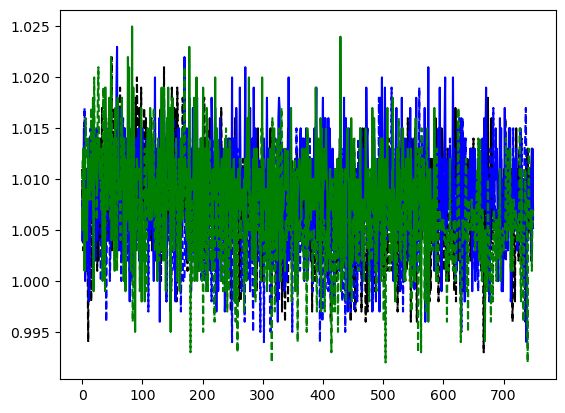

In [25]:
# Plot optical transmission
fig1, ax1 = plot_lisst('optical_transmission', all_lisst_data)

In [7]:
# Plot laser transmission

In [ ]:
# Plot laser reference